In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
# Load the data
df = pd.read_csv('/content/Churn-Data.csv')

In [10]:
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'Charges_Month', 'cID_0003-MKNFE',
       'cID_0004-TLHLJ', 'cID_0011-IGKFF', 'cID_0013-EXCHZ', 'cID_0013-MHZWF',
       'cID_0013-SMEOE', 'cID_0014-BMAQU',
       ...
       'TotalCharges_992.7', 'TotalCharges_994.55', 'TotalCharges_995.35',
       'TotalCharges_996.85', 'TotalCharges_996.95', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=10962)


In [11]:
# Optional: Drop unnecessary columns
# df.drop(['customerID'], axis=1, inplace=True)

# Encode categorical variables if any
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes'].apply(lambda x: 1 if x == 'Yes' else 0)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8496 - loss: 0.3353 - val_accuracy: 1.0000 - val_loss: 0.0140
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9997 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 9.6909e-04 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9998 - loss: 8.6950e-04 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 5.4161e-04 - 

In [18]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the testing data
# Assuming X_test is the input data

# Convert NumPy array to TensorFlow tensor
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Use the converted tensor for prediction
y_pred_probs= model.predict(X_test_tensor) #Get predicted probabilities for each class
y_pred_classes = y_pred_probs.argmax(axis=-1) # Convert probabilities to predicted classes

# Assuming y_true and y_pred_classes are the actual and predicted labels, respectivel
accuracy= accuracy_score(y_test, y_pred_classes)
f1= f1_score(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 1.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
## Convert categorical columns to dummy variables
# df=pd.get_dummies(df, columns=['', 'category_column2'])

## Create new features if necessary
# df['total_usage']=df['voice_usage']+df['data_usage']

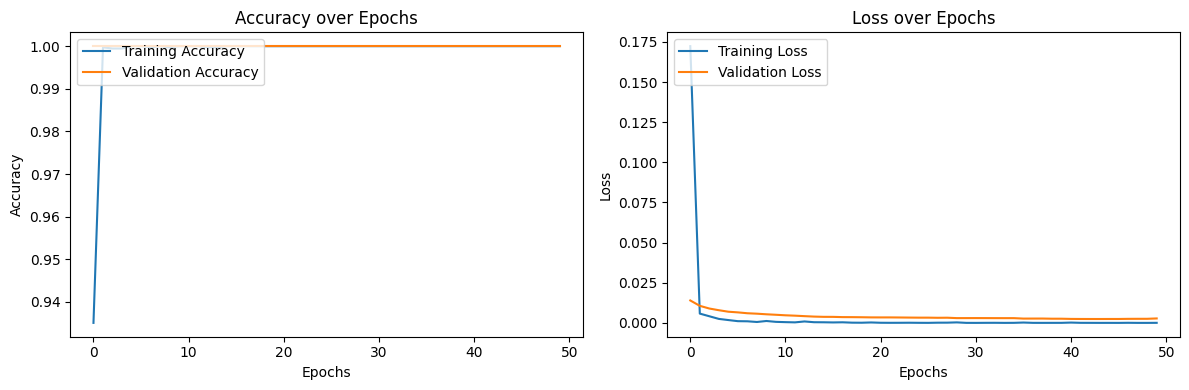

In [20]:
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, axes= plt.subplots(1,2, figsize=(12,4))

# Plot accuracy over epochs for training and validation sets
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')

# Plot loss over epochs for training and validation sets
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()